In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('csv/ec_data.csv')

data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [3]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [4]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [5]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# What is fit transform?
# Fit method is calculating the mean and variance of each of the features present in our data.
X_test = scaler.transform(X_test)
# what is transform?
# Transform method is transforming all the features using the respective mean and variance.

In [8]:
X_train.shape[1]

4

In [9]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

d:\Code_dumpspace\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 128 neurons
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

In [34]:
model3 = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 512 neurons
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 256 neurons
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

d:\Code_dumpspace\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hyperparameter Tuning: changing the parameters
Like:
1. No of neural network
2. No of layers
3. No of Epochs
4. No of Batch size
5. Validation
6. 

In [35]:
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])  
# Mean Squared Error and Mean Absolute Error

In [ ]:
history = model3.fit(X_train, y_train, epochs=60, batch_size=10, validation_split=0.2, verbose=1) 

# history = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1) , with model1

# 20% of the training data will be used for validation, that is 80% of the training data will be used for training
# 20% of 800 = 160, 640 will be used for training and 160 will be used for validation
# 50 epochs, 32 batch size
# 20 total batches will be there, 32 data points in each batch

Epoch 1/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17723.0605 - mae: 114.5829 - val_loss: 19216.4805 - val_mae: 118.2791
Epoch 2/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18191.8906 - mae: 117.0331 - val_loss: 17847.3359 - val_mae: 114.2897
Epoch 3/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16923.9551 - mae: 109.7779 - val_loss: 17899.2246 - val_mae: 115.3374
Epoch 4/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16742.4531 - mae: 111.2010 - val_loss: 18499.6836 - val_mae: 116.8714
Epoch 5/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17433.5879 - mae: 113.4937 - val_loss: 17760.3867 - val_mae: 115.8757
Epoch 6/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16074.5166 - mae: 108.7850 - val_loss: 18950.4355 - val_mae: 118.1826
Epoch 7/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17599.3066 - mae: 114.4182 - val_loss: 18370.7012 - val_mae: 116.4925
Epoch 8/60
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16292.3320 - mae: 109.7777 - val_loss: 17685.7

Number of times the model is trained on the entire dataset is called an epoch.

In [39]:
test_loss, test_mae = model3.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17746.6523 - mae: 114.5118 
Test Mean Absolute Error: 113.50


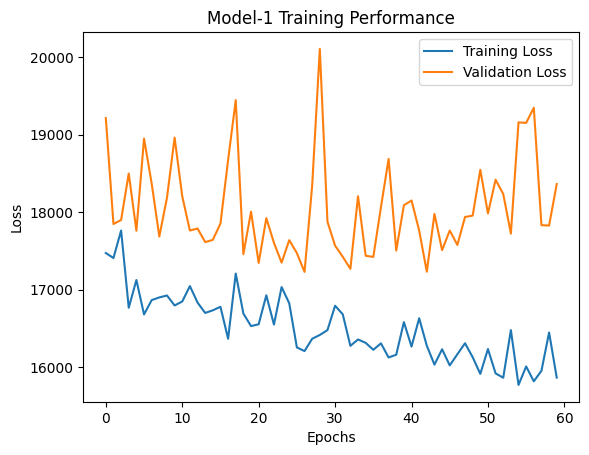

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model-1 Training Performance')
plt.legend()
plt.show()

In [41]:
predictions = model1.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[-3.68839473e-01],
       [-2.80363590e-01],
       [-1.24326684e-01],
       [-1.03488944e-01],
       [-1.25219703e-01],
       [-1.71065733e-01],
       [-1.83437675e-01],
       [-3.50739896e-01],
       [-4.65687245e-01],
       [-2.73055434e-01],
       [ 1.40824839e-01],
       [-7.97662064e-02],
       [ 6.72088712e-02],
       [ 9.19148996e-02],
       [ 7.97960460e-02],
       [-5.14605343e-01],
       [ 9.70484093e-02],
       [-3.60202372e-01],
       [-4.38818455e-01],
       [-7.64219463e-02],
       [ 1.23503190e-02],
       [-6.62033558e-02],
       [ 7.24574849e-02],
       [ 9.16130990e-02],
       [-1.49204955e-03],
       [-2.91392431e-02],
       [ 7.76037723e-02],
       [-7.98094720e-02],
       [-4.83495414e-01],
       [-3.23140770e-01],
       [-7.46311769e-02],
       [ 8.38200301e-02],
       [-4.84112352e-02],
       [ 1.77106231e-01],
       [-5.52997515e-02],
       [ 6.10496327e-02],
       [-1.13861486e-01],
       [-1.09964237e-02],
       [ 4.8

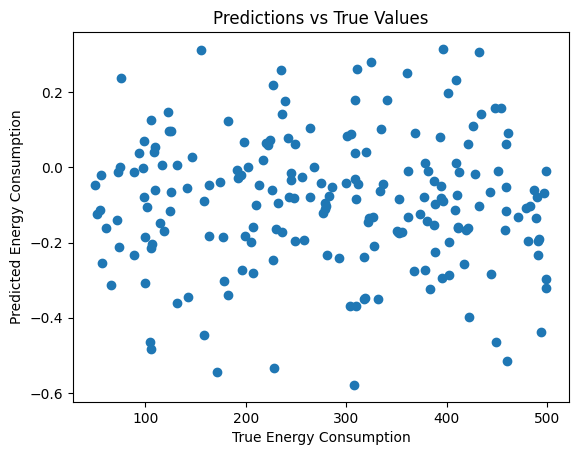

In [42]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()

In [1]:
import psutil
print(f"Memory used: {psutil.virtual_memory().percent}%")

Memory used: 80.2%


In [2]:
jupyter notebook list

SyntaxError: invalid syntax (1373106854.py, line 1)